# Assignment 2 Q 2.1- Pole Zero and log magnitude plot

In [1]:
import numpy as np                                  #import numpy lib as np
import matplotlib.pyplot as plt                     #import plot lib as plt
import cmath
import matplotlib.patches as patches                     #import plot lib as plt
from scipy import signal

def zplane(b,a):
    # Plot the complex z-plane given a transfer function.
    # get a figure/plot
    ax = plt.subplot(111)
    # create the unit circle
    uc = patches.Circle((0, 0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)
    
    # Get the zeros
    z = b
    p = a
    print(z)
    
    # Plot the zeros and set marker properties
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)  # 'go' means 'green solid circle' marker
    plt.setp(t1, markersize=10.0, markeredgewidth=1.0,
             markeredgecolor='k', markerfacecolor='g')  # 'k'  means 'black' color

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)  # 'rx' means 'red solid X' marker
    plt.setp(t2, markersize=10.0, markeredgewidth=3.0,
             markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 2  # radius up to which the pole zero plots are plotted in the graph
    plt.axis('scaled')
    plt.axis([-r, r, -r, r])
    ticks = [ -2, -1, 0, 1, 2 ]
    # values at which the ticks appear on the X and Y axes
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.show()
    
    print(p,z)

# we can take the values from input and compare with (1- azinv) and if the magnitude of a is smaller than 1 for all zero and pole then its the minimum phase system

In [2]:
#here in the question the values are given in standard form i.e (1-a*zinv) for which a will be its pole/zero.

j = cmath.sqrt(-1)                             #iota as sqrt(-1)
a=np.array([0,0,0,0,0])                         #poles or denominator
b=np.array([0.9*np.exp(j*0.6*np.pi),0.9*np.exp(-j*0.6*np.pi),1.25*np.exp(j*0.8*np.pi),1.25*np.exp(-j*0.8*np.pi)]) #zeros/numerator 


[-0.27811529+0.85595086j -0.27811529-0.85595086j -1.01127124+0.73473157j
 -1.01127124-0.73473157j]


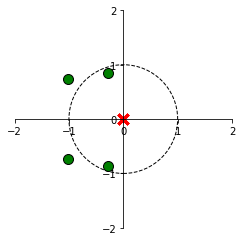

[0 0 0 0 0] [-0.27811529+0.85595086j -0.27811529-0.85595086j -1.01127124+0.73473157j
 -1.01127124-0.73473157j]


In [3]:
z =zplane(b,a)                #print the values of z at inputs b

# Hz, magnitude and phase plot 

Text(0.5, 1.0, 'Phase angle PLOT ')

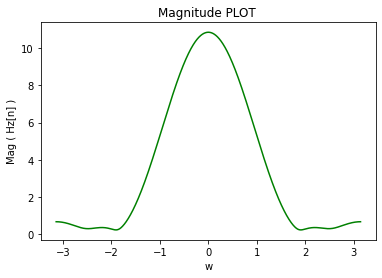

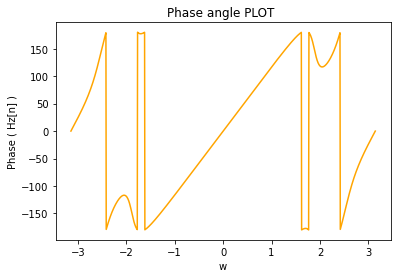

In [4]:
w = np.linspace(-np.pi, np.pi, 1001)                 #range of 2 b/w -pi to pi
z=(np.exp(j*w))                                     # z =e^jw            
Hz= ((1-b[0]*z)*(1-b[1]*z)*(1-b[2]*z)*(1-b[3]*z))   #equation given in question
#phase and magnitude plot 
phaseHz = np.zeros([len(w)])              #define total length of phase 
for i in range(0,len(w)):
    phaseHz[i] = cmath.phase(Hz[i])        #phase of Y[n] using cmath library.
    
# Magnitude
plt.plot(w, np.abs(Hz),'g')               # green color plot of Abs(Y[n]) vs w
plt.xlabel("w")
plt.ylabel("Mag ( Hz[n] )")
plt.title("Magnitude PLOT ") 
plt.figure()
# Phase
plt.plot(w, phaseHz*180/np.pi,'orange')   # green color plot of Phase(Y[n]) in degrees vs w 
plt.xlabel("w")
plt.ylabel("Phase ( Hz[n] )")
plt.title("Phase angle PLOT ") 

# Group delay using scipy library 

In [5]:
w, gd = signal.group_delay((b,a),w,whole=True,f=0.01)       #group delay using the scipy library for Hz
plt.plot(w, gd)                           #plot group delay w.r.t. w

TypeError: group_delay() got an unexpected keyword argument 'f'

In [8]:
from sympy import Derivative
angle = np.arctan2(Hz.imag /Hz.real)
grupdly= Derivative( angle,w )
plt.plot(w,grupdly) 

ValueError: invalid number of arguments

In [13]:
from scipy import signal
w ,gd= signal.group_delay(Hz,w=3.14)

ValueError: too many values to unpack (expected 2)